<a href="https://colab.research.google.com/github/mushrafi88/MSE_510/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushrafi Munim Sushmit

Homework 4 for the MSE510/420 Course
- Instructor Sergei V. Kalinin, sergei2@utk.edu
- Please provide your name in the beginning of the notebook
- To submit the homework, please share it with my gmail address (available on Canvas)

- Run the code cell below
- If the gdown does not work due to too many requests, use the file hw3.zip on course GitHub page

In [1]:
!gdown https://drive.google.com/uc?id=1UC6bu5nVFRBhHIL698jk0zt3AuDqREkV
!unzip hw3.zip

Downloading...
From: https://drive.google.com/uc?id=1UC6bu5nVFRBhHIL698jk0zt3AuDqREkV
To: /content/hw3.zip
100% 9.96k/9.96k [00:00<00:00, 25.1MB/s]
Archive:  hw3.zip
replace hw3p1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace hw3p2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace hw3p3.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Now you have created 3 csv files, named hw3p1, hw3p2, and hw3p3 respectively. Load the file hw3p1 into Pandas DataFrame. It will contain three sets of data representing x and corresponding f(x). There are three sets of data overall.

In [2]:
import pandas as pd

# Load all three CSV files
df1 = pd.read_csv("hw3p1.csv")

df1


,x,y,x.1,y.1,x.2,y.2
0,0.0,-0.130805,0.0,0.005324,0.0,0.773195
1,0.1,0.868900,0.1,0.794294,0.1,0.236410
2,0.2,0.765312,0.2,0.964300,0.2,0.754516
3,0.3,0.814069,0.3,1.725895,0.3,0.307927
4,0.4,0.629915,0.4,1.198981,0.4,0.027610
...,...,...,...,...,...,...
95,9.5,9.840495,9.5,25.963140,9.5,9.991476
96,9.6,9.609545,9.6,25.090002,9.6,8.787114
97,9.7,9.998531,9.7,25.196839,9.7,10.080249
98,9.8,10.575275,9.8,28.172518,9.8,9.354173


In [3]:
!pip install pysr

## Problem 1. Fit the first set of data. Please try to find equation that can explain whole data set (not spline)

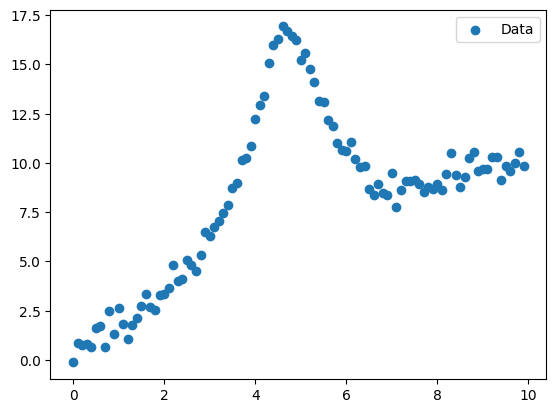

In [4]:
import matplotlib.pyplot as plt
import numpy as np


X = df1[['x']].values   # must be 2D
y = df1['y'].values     # 1D

plt.scatter(X, y, label="Data")
plt.legend()
plt.show()

In [5]:
from pysr import PySRRegressor



model = PySRRegressor(
    niterations=300,
    population_size=50,
    maxsize=20,
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["sin", "cos"],
    model_selection="best",
)



model.fit(X, y)


/usr/local/lib/python3.12/dist-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
INFO:pysr.sr:Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 9.870e+04
Progress: 283 / 9300 total iterations (3.043%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.890e+01  0.000e+00  y = 8.2563
3           1.196e+01  2.287e-01  y = x₀ + 3.3061
5           1.190e+01  2.452e-03  y = (x₀ / 1.0916) + 3.7215
6           8.558e+00  3.298e-01  y = (x₀ + 3.4929) - sin(x₀)
8           3.586e+00  4.349e-01  y = ((0.9452 - sin(x₀)) * 4.3574) + x₀
10          3.417e+00  2.419e-02  y = (x₀ - ((sin(x₀) * 5.1307) + -5.6474)) / 1.1675
12          2.017e+00  2.636e-01  y = (x₀ - (sin((x₀ * 0.85314) - -0.67975) * 4.4625)) + 4.2...
                                      329
14          1.908e+00  2.764e-02  y = x₀ - ((((sin(x₀) * 0.46075) + 0.41228) - cos(cos(x₀)))...
                                       / 0.094062)
15 

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                           8.256319   
	1         0.228678                                      x0 + 3.306103   
	2         0.002453                       (x0 * 0.9162053) + 3.7208445   
	3         0.329830                         (x0 + 3.4929326) - sin(x0)   
	4         0.691443                     x0 / cos(sin(x0) + -0.3181292)   
	5         1.009906           x0 + (3.2427685 / (sin(x0) + 1.2492062))   
	6         0.544839        x0 / cos(sin(x0 / -2.7479718) * -1.2595526)   
	7   >>>>  1.437456  x0 + (0.6725459 / (sin(x0 / -2.9822028) + 1.05...   
	8         0.012542  (x0 + -0.17649218) + (0.71837246 / (sin(x0 / -...   
	9         0.001002  (0.71837246 / (sin(x0 / -2.9820778) + 1.059184...   
	10        0.000089  (x0 / 0.99405646) + (-0.11183882 + ((0.7183724...   
	11        0.000529  ((-0.30069932 - (cos(x0) * 0.057385672)) + (0....   
	12        0.033015  (x0 + (cos(cos(-0.75159883 - x0)) * -0.4450543...   
	13        0.016951  (-0.28184256 - (sin(x0 / -0.49238577) * -0.151...   
	
	         loss  complexity  
	0   18.896236           1  
	1   11.960463           3  
	2   11.901931           5  
	3    8.558032           6  
	4    4.286314           7  
	5    1.561304           8  
	6    0.905455           9  
	7    0.215074          10  
	8    0.209746          12  
	9    0.209326          14  
	10   0.209289          16  
	11   0.209068          18  
	12   0.202278          19  
	13   0.198878          20  
]

  - outputs/20260218_164238_xblZYW/hall_of_fame.csv


In [6]:
model.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,18.896236,8.256319,0.000000,8.25631900000000,PySRFunction(X=>8.25631900000000)
1,3,11.960463,x0 + 3.306103,0.228678,x0 + 3.306103,PySRFunction(X=>x0 + 3.306103)
2,5,11.901931,(x0 * 0.9162053) + 3.7208445,0.002453,x0*0.9162053 + 3.7208445,PySRFunction(X=>x0*0.9162053 + 3.7208445)
3,6,8.558032,(x0 + 3.4929326) - sin(x0),0.329830,x0 - sin(x0) + 3.4929326,PySRFunction(X=>x0 - sin(x0) + 3.4929326)
4,7,4.286314,x0 / cos(sin(x0) + -0.3181292),0.691443,x0/cos(sin(x0) - 0.3181292),PySRFunction(X=>x0/cos(sin(x0) - 0.3181292))
5,8,1.561304,x0 + (3.2427685 / (sin(x0) + 1.2492062)),1.009906,x0 + 3.2427685/(sin(x0) + 1.2492062),PySRFunction(X=>x0 + 3.2427685/(sin(x0) + 1.24...
6,9,0.905455,x0 / cos(sin(x0 / -2.7479718) * -1.2595526),0.544839,x0/cos(sin(x0/(-2.7479718))*(-1.2595526)),PySRFunction(X=>x0/cos(sin(x0/(-2.7479718))*(-...
7,10,0.215074,x0 + (0.6725459 / (sin(x0 / -2.9822028) + 1.05...,1.437456,x0 + 0.6725459/(sin(x0/(-2.9822028)) + 1.0559518),PySRFunction(X=>x0 + 0.6725459/(sin(x0/(-2.982...
8,12,0.209746,(x0 + -0.17649218) + (0.71837246 / (sin(x0 / -...,0.012542,x0 - 0.17649218 + 0.71837246/(sin(x0/(-2.98207...,PySRFunction(X=>x0 - 0.17649218 + 0.71837246/(...
9,14,0.209326,(0.71837246 / (sin(x0 / -2.9820778) + 1.059184...,0.001002,(x0 - 0.1979629)/0.99473405 + 0.71837246/(sin(...,PySRFunction(X=>(x0 - 0.1979629)/0.99473405 + ...


In [7]:
print(model.get_best())

complexity                                                      10
loss                                                      0.215074
equation         x0 + (0.6725459 / (sin(x0 / -2.9822028) + 1.05...
score                                                     1.437456
sympy_format     x0 + 0.6725459/(sin(x0/(-2.9822028)) + 1.0559518)
lambda_format    PySRFunction(X=>x0 + 0.6725459/(sin(x0/(-2.982...
Name: 7, dtype: object


In [10]:
y_pred_train = model.predict(X)


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred_train)
r2 = r2_score(y, y_pred_train)

summary_df = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R²"],
    "Value": [mse, rmse, mae, r2]
})

summary_df


,Metric,Value
0,MSE,0.215074
1,RMSE,0.463761
2,MAE,0.365098
3,R²,0.988618


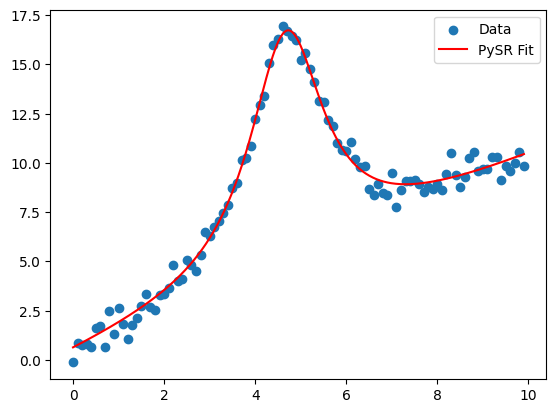

In [12]:
import matplotlib.pyplot as plt

x_plot = np.linspace(min(X), max(X), 500).reshape(-1,1)
y_pred = model.predict(x_plot)

plt.scatter(X, y, label="Data")
plt.plot(x_plot, y_pred, color='red', label="PySR Fit")
plt.legend()
plt.show()


## Problem 2. Fit the second set of data.  Please try to find equation that can explain whole data set (not spline)

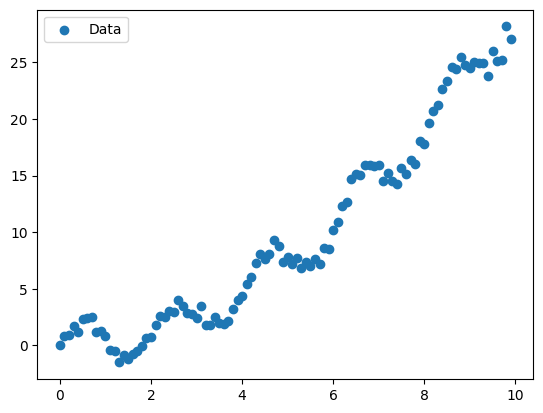

In [33]:
import matplotlib.pyplot as plt
import numpy as np


X = df1[['x.1']].values   # must be 2D
y = df1['y.1'].values     # 1D

plt.scatter(X, y, label="Data")
plt.legend()
plt.show()

In [34]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=300,
    population_size=40,
    maxsize=25,
    binary_operators=["+", "-", "*"],
    unary_operators=["sin"],
    model_selection="best",
    verbosity=1,
)

model.fit(X, y)

/usr/local/lib/python3.12/dist-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 8.400e+04
Progress: 283 / 9300 total iterations (3.043%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.054e+01  0.000e+00  y = x₀
3           1.205e+01  8.073e-01  y = x₀ * 2.2152
5           2.223e+00  8.450e-01  y = x₀ * (x₀ * 0.29606)
7           2.190e+00  7.419e-03  y = ((x₀ * 0.29151) * x₀) - -0.27055
9           2.188e+00  3.569e-04  y = (x₀ * ((x₀ * 0.29664) + -0.054243)) + 0.37058
11          2.172e+00  3.755e-03  y = ((x₀ * (x₀ + 0.37391)) + sin(sin(x₀))) * 0.28191
12          1.461e+00  3.962e-01  y = x₀ * ((x₀ + sin((x₀ + x₀) + x₀)) * 0.28509)
13          1.442e+00  1.368e-02  y = (x₀ * (sin(sin((x₀ + x₀) + x₀)) + x₀)) * 0.28509
14          5.925e-01  8.891e-01  y = (sin(x₀ - (x₀ * -2.0964)) + x₀) * ((x₀ - -0.31375) * 0...
        

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.054e+01  0.000e+00  y = x₀
3           1.205e+01  8.073e-01  y = x₀ * 2.2152
5           2.223e+00  8.450e-01  y = x₀ * (x₀ * 0.29606)
7           2.190e+00  7.419e-03  y = ((x₀ * 0.29151) * x₀) - -0.27055
8           2.167e+00  1.047e-02  y = (x₀ * sin(x₀ * -0.070471)) * -4.4572
10          6.101e-01  6.338e-01  y = (x₀ * 0.30046) * (x₀ - sin(x₀ * -3.0976))
12          2.339e-01  4.793e-01  y = (sin(x₀ * 3.0955) * 1.9915) - ((x₀ * -0.29886) * x₀)
14          2.329e-01  2.125e-03  y = (sin(x₀ * 3.0953) * 1.9882) - (x₀ * ((x₀ + 0.074641) *...
                                       -0.29608))
16          2.246e-01  1.821e-02  y = (x₀ * (x₀ * 0.29921)) - (sin(x₀ * -3.0958) * ((x₀ * 0....
                                      047271) + 1.7546))
17          2.246e-01  3.338e-05  y = (x₀ * (x₀ * 0.2992)) - ((sin(x₀ * 0.049151) + 1.7501) 

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                                 x0   
	1         0.807261                                     x0 * 2.2152216   
	2         0.845024                             x0 * (x0 * 0.29606178)   
	3         0.007419               ((x0 * 0.2915065) * x0) - -0.2705544   
	4         0.010468          (x0 * sin(x0 * -0.070470795)) * -4.457238   
	5         0.633756     (x0 * 0.3004628) * (x0 - sin(x0 * -3.0975792))   
	6   >>>>  0.479274  (sin(x0 * 3.0954723) * 1.9915369) - ((x0 * -0....   
	7         0.002125  (sin(x0 * 3.0952563) * 1.988226) - (x0 * ((x0 ...   
	8         0.018213  (x0 * (x0 * 0.2992056)) - (sin(x0 * -3.0958264...   
	9         0.000033  (x0 * (x0 * 0.2991973)) - ((sin(x0 * 0.0491509...   
	10        0.004372  ((x0 * (x0 * 0.29840434)) + 0.047349762) - (((...   
	11        0.047224  ((x0 * 0.29867467) * x0) - (((sin(x0 * 0.66240...   
	12        0.051537  (((sin((x0 * 2.0026648) * x0) * 0.42635497) - ...   
	13        0.003769  (sin(x0 * 3.0962882) * (1.9895301 - (sin(sin((...   
	14        0.001345  (sin(x0 * 3.0963974) * (1.9991117 - (sin(((x0 ...   
	15        0.131413  ((2.0018713 - (sin((x0 * (x0 + x0)) - sin(x0))...   
	16        0.002848  (sin(x0 * 3.0945103) * (1.9997469 - (sin(sin((...   
	
	         loss  complexity  
	0   60.535260           1  
	1   12.045662           3  
	2    2.222553           5  
	3    2.189819           7  
	4    2.167015           8  
	5    0.610082          10  
	6    0.233935          12  
	7    0.232943          14  
	8    0.224611          16  
	9    0.224603          17  
	10   0.223623          18  
	11   0.213308          19  
	12   0.192417          21  
	13   0.191693          22  
	14   0.191436          23  
	15   0.167861          24  
	16   0.167384          25  
]

  - outputs/20260218_170359_kDa1Yz/hall_of_fame.csv


In [35]:
model.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,60.535260,x0,0.000000,x0,PySRFunction(X=>x0)
1,3,12.045662,x0 * 2.2152216,0.807261,x0*2.2152216,PySRFunction(X=>x0*2.2152216)
2,5,2.222553,x0 * (x0 * 0.29606178),0.845024,x0*x0*0.29606178,PySRFunction(X=>x0*x0*0.29606178)
3,7,2.189819,((x0 * 0.2915065) * x0) - -0.2705544,0.007419,x0*0.2915065*x0 - 1*(-0.2705544),PySRFunction(X=>x0*0.2915065*x0 - 1*(-0.2705544))
4,8,2.167015,(x0 * sin(x0 * -0.070470795)) * -4.457238,0.010468,x0*sin(x0*(-0.070470795))*(-4.457238),PySRFunction(X=>x0*sin(x0*(-0.070470795))*(-4....
5,10,0.610082,(x0 * 0.3004628) * (x0 - sin(x0 * -3.0975792)),0.633756,x0*0.3004628*(x0 - sin(x0*(-3.0975792))),PySRFunction(X=>x0*0.3004628*(x0 - sin(x0*(-3....
6,12,0.233935,(sin(x0 * 3.0954723) * 1.9915369) - ((x0 * -0....,0.479274,-(-0.29886106)*x0*x0 + sin(x0*3.0954723)*1.991...,PySRFunction(X=>-(-0.29886106)*x0*x0 + sin(x0*...
7,14,0.232943,(sin(x0 * 3.0952563) * 1.988226) - (x0 * ((x0 ...,0.002125,-(-0.29607657)*x0*(x0 + 0.07464132) + sin(x0*3...,PySRFunction(X=>-(-0.29607657)*x0*(x0 + 0.0746...
8,16,0.224611,(x0 * (x0 * 0.2992056)) - (sin(x0 * -3.0958264...,0.018213,x0*x0*0.2992056 - (x0*0.047270544 + 1.7546184)...,PySRFunction(X=>x0*x0*0.2992056 - (x0*0.047270...
9,17,0.224603,(x0 * (x0 * 0.2991973)) - ((sin(x0 * 0.0491509...,0.000033,x0*x0*0.2991973 - (sin(x0*0.049150944) + 1.750...,PySRFunction(X=>x0*x0*0.2991973 - (sin(x0*0.04...


In [36]:
print(model.get_best())

complexity                                                      12
loss                                                      0.233935
equation         (sin(x0 * 3.0954723) * 1.9915369) - ((x0 * -0....
score                                                     0.479274
sympy_format     -(-0.29886106)*x0*x0 + sin(x0*3.0954723)*1.991...
lambda_format    PySRFunction(X=>-(-0.29886106)*x0*x0 + sin(x0*...
Name: 6, dtype: object


In [37]:
y_pred_train = model.predict(X)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred_train)
r2 = r2_score(y, y_pred_train)

summary_df = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R²"],
    "Value": [mse, rmse, mae, r2]
})

summary_df

,Metric,Value
0,MSE,0.233936
1,RMSE,0.483669
2,MAE,0.397760
3,R²,0.996934


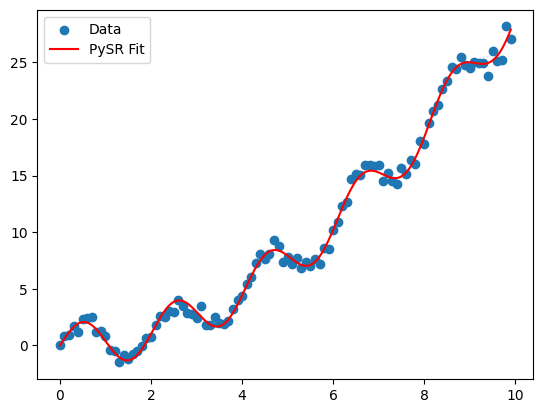

In [39]:
import matplotlib.pyplot as plt

x_plot = np.linspace(min(X), max(X), 500).reshape(-1,1)
y_pred = model.predict(x_plot)

plt.scatter(X, y, label="Data")
plt.plot(x_plot, y_pred, color='red', label="PySR Fit")
plt.legend()
plt.show()


## Problem 3. Fit the third set of data.  Please try to find equation that can explain whole data set (not spline)

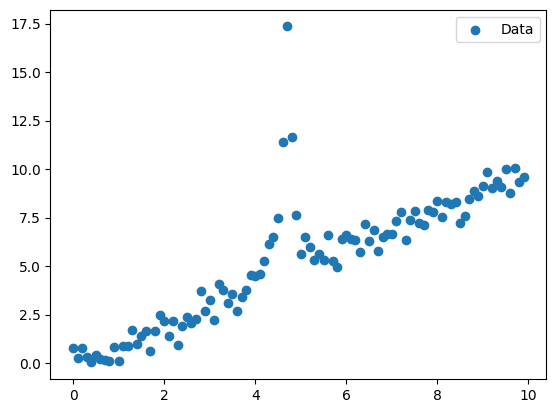

In [40]:
import matplotlib.pyplot as plt
import numpy as np


X = df1[['x.2']].values   # must be 2D
y = df1['y.2'].values     # 1D

plt.scatter(X, y, label="Data")
plt.legend()
plt.show()

In [41]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=300,
    population_size=40,
    maxsize=25,
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["sin", "cos"],
    model_selection="best",
    verbosity=1,
)

model.fit(X, y)

/usr/local/lib/python3.12/dist-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 8.240e+04
Progress: 298 / 9300 total iterations (3.204%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.062e+00  0.000e+00  y = x₀
3           2.968e+00  1.566e-02  y = x₀ + 0.30739
4           2.563e+00  1.467e-01  y = x₀ - sin(x₀)
6           2.319e+00  4.999e-02  y = (x₀ - sin(x₀)) - -0.4938
8           2.211e+00  2.374e-02  y = (x₀ + cos(cos(x₀))) - sin(x₀)
9           1.999e+00  1.011e-01  y = (x₀ - sin(x₀ + cos(x₀))) + 0.9275
10          1.956e+00  2.157e-02  y = (((-0.10538 / cos(x₀)) + x₀) + 0.48839) - 0.24466
11          1.952e+00  2.315e-03  y = (x₀ + cos(cos(x₀))) - sin(x₀ + cos(x₀))
12          1.949e+00  1.291e-03  y = x₀ + (0.92758 - sin(x₀ + (cos(x₀) + cos(x₀))))
13          1.944e+00  2.502e-03  y = (x₀ + cos(0.094968)) - sin(x₀

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                                 x0   
	1         0.015664                                    x0 + 0.30739066   
	2         0.146711                                       x0 - sin(x0)   
	3         0.126464                      (-0.106639534 / cos(x0)) + x0   
	4         0.318916                   x0 / cos(-0.016065245 / cos(x0))   
	5         0.000042              x0 / cos(-0.016064737 / sin(cos(x0)))   
	6         0.018911     (x0 / cos(-0.01600379 / cos(x0))) + 0.16604261   
	7         0.195281       (x0 / cos(-0.015822604 / cos(x0))) - sin(x0)   
	8         0.179406   (x0 - sin(x0)) / cos(sin(-0.13611136 / cos(x0)))   
	9         0.104342  (x0 - sin(x0)) / cos(sin(-0.13578007 / cos(x0)...   
	10        0.036028  (x0 - sin(x0)) / cos(sin(-0.118714355 / (cos(x...   
	11        0.039234  (x0 - -4.093819) + (sin((sin(cos(x0 + cos(x0))...   
	12        0.077845  x0 + ((sin(x0 + (sin(sin(cos(cos(x0) + x0))) *...   
	13        0.476787  ((sin(x0 + (sin(cos(x0 + cos(x0)) * 2.2694027)...   
	14  >>>>  0.179437  (sin(x0 + (sin(sin(cos(cos(x0) + x0) * 2.29759...   
	15        0.110474  (sin(x0 + (sin(sin(sin(cos(x0 + cos(x0))) * 2....   
	16        0.077260  x0 + ((sin(x0 + (sin(sin(sin(sin(cos(x0 + cos(...   
	17        0.035823  (sin((sin(sin(sin(sin(sin(cos(cos(x0) + x0)) *...   
	18        0.014170  x0 + ((sin((sin(sin(sin(sin(sin(sin(cos(x0 + c...   
	19        0.030060  x0 + ((sin(((sin(sin(sin(sin(sin(cos(cos(x0) +...   
	
	        loss  complexity  
	0   3.062223           1  
	1   2.967776           3  
	2   2.562803           4  
	3   1.990078           6  
	4   1.446661           7  
	5   1.446600           8  
	6   1.419501           9  
	7   1.167686          10  
	8   0.975913          11  
	9   0.792103          13  
	10  0.737034          15  
	11  0.681412          17  
	12  0.630380          18  
	13  0.391324          19  
	14  0.327045          20  
	15  0.292839          21  
	16  0.271067          22  
	17  0.261528          23  
	18  0.257848          24  
	19  0.250213          25  
]

  - outputs/20260218_171039_Bl4kXk/hall_of_fame.csv


In [43]:
model.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,3.062223,x0,0.000000,x0,PySRFunction(X=>x0)
1,3,2.967776,x0 + 0.30739066,0.015664,x0 + 0.30739066,PySRFunction(X=>x0 + 0.30739066)
2,4,2.562803,x0 - sin(x0),0.146711,x0 - sin(x0),PySRFunction(X=>x0 - sin(x0))
3,6,1.990078,(-0.106639534 / cos(x0)) + x0,0.126464,x0 - 0.106639534/cos(x0),PySRFunction(X=>x0 - 0.106639534/cos(x0))
4,7,1.446661,x0 / cos(-0.016065245 / cos(x0)),0.318916,x0/cos(-0.016065245/cos(x0)),PySRFunction(X=>x0/cos(-0.016065245/cos(x0)))
5,8,1.446600,x0 / cos(-0.016064737 / sin(cos(x0))),0.000042,x0/cos(-0.016064737/sin(cos(x0))),PySRFunction(X=>x0/cos(-0.016064737/sin(cos(x0...
6,9,1.419501,(x0 / cos(-0.01600379 / cos(x0))) + 0.16604261,0.018911,x0/cos(-0.01600379/cos(x0)) + 0.16604261,PySRFunction(X=>x0/cos(-0.01600379/cos(x0)) + ...
7,10,1.167686,(x0 / cos(-0.015822604 / cos(x0))) - sin(x0),0.195281,x0/cos(-0.015822604/cos(x0)) - sin(x0),PySRFunction(X=>x0/cos(-0.015822604/cos(x0)) -...
8,11,0.975913,(x0 - sin(x0)) / cos(sin(-0.13611136 / cos(x0))),0.179406,(x0 - sin(x0))/cos(sin(-0.13611136/cos(x0))),PySRFunction(X=>(x0 - sin(x0))/cos(sin(-0.1361...
9,13,0.792103,(x0 - sin(x0)) / cos(sin(-0.13578007 / cos(x0)...,0.104342,(x0 - sin(x0))/cos(sin(-0.13578007/cos(x0))/0....,PySRFunction(X=>(x0 - sin(x0))/cos(sin(-0.1357...


In [44]:
print(model.get_best())

complexity                                                      20
loss                                                      0.327045
equation         (sin(x0 + (sin(sin(cos(cos(x0) + x0) * 2.29759...
score                                                     0.179437
sympy_format     x0 + sin(x0 + sin(sin(cos(x0 + cos(x0))*2.2975...
lambda_format    PySRFunction(X=>x0 + sin(x0 + sin(sin(cos(x0 +...
Name: 14, dtype: object


In [45]:
y_pred_train = model.predict(X)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred_train)
r2 = r2_score(y, y_pred_train)

summary_df = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R²"],
    "Value": [mse, rmse, mae, r2]
})

summary_df

,Metric,Value
0,MSE,0.327046
1,RMSE,0.571879
2,MAE,0.443436
3,R²,0.970513


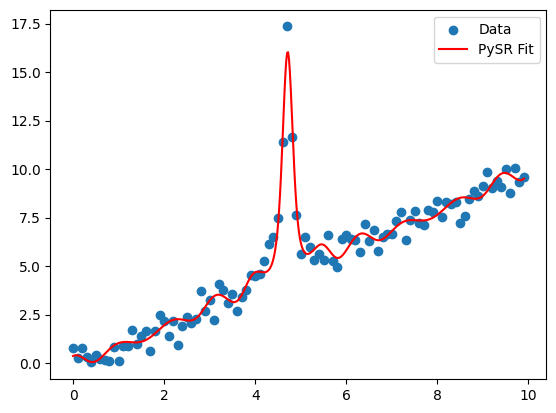

In [47]:
import matplotlib.pyplot as plt

x_plot = np.linspace(min(X), max(X), 500).reshape(-1,1)
y_pred = model.predict(x_plot)

plt.scatter(X, y, label="Data")
plt.plot(x_plot, y_pred, color='red', label="PySR Fit")
plt.legend()
plt.show()


Load the file hw3p2 into Pandas DataFrame. It will contain values of x, y, and f = f(x,y)

## Problem 4: Fit f(x,y).  Please try to find equation that can explain whole data set (not spline)

In [1]:
import pandas as pd
import numpy as np

df2 = pd.read_csv("hw3p2.csv")

df2

,x,y,z
0,2.250778,-2.388144,0.004587
1,2.761474,-1.260846,0.009974
2,-1.490146,1.258894,0.149169
3,-0.828948,1.705002,0.165780
4,-1.877060,-0.781176,0.126591
...,...,...,...
95,1.493305,1.825888,0.061920
96,-1.445071,-2.207995,0.030754
97,-1.177728,-2.416169,0.026985
98,-2.011753,-0.262688,0.127699


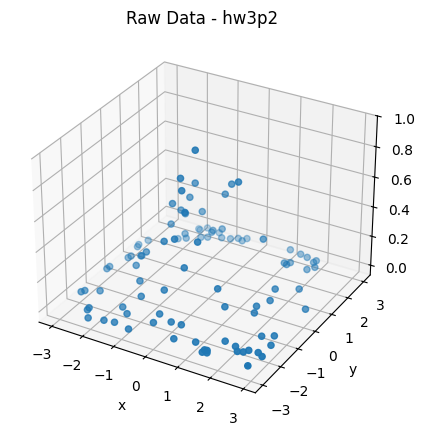

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract variables
X = df2[['x', 'y']].values
z = df2['z'].values

# 3D scatter plot
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['x'], df2['y'], df2['z'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Raw Data - hw3p2")
plt.show()


In [ ]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=300,
    population_size=40,
    maxsize=30,
    binary_operators=["+", "-", "*"],
    unary_operators=["sin", "cos"],
    model_selection="best",
    verbosity=1,
)

model.fit(X, z)


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


/usr/local/lib/python3.12/dist-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
INFO:pysr.sr:Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 7.180e+04
Progress: 287 / 9300 total iterations (3.086%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           4.179e-02  0.000e+00  y = 0.13368
5           4.028e-02  9.195e-03  y = cos(sin(x₀)) * 0.18383
6           2.694e-02  4.023e-01  y = (cos(x₁) * 0.17309) - -0.15501
7           2.694e-02  1.476e-04  y = sin((cos(x₁) * 0.17586) - -0.15686)
8           2.685e-02  3.159e-03  y = (cos(x₁ * -1.1042) * 0.16865) + 0.17123
9           1.213e-02  7.948e-01  y = ((cos(x₀) + 0.81251) + cos(x₁)) * 0.18383
11          2.355e-03  8.195e-01  y = (cos(x₀) + 0.84789) * ((cos(x₁) * 0.21668) + 0.18451)
13          1.410e-03  2.566e-01  y = ((cos(x₁ * 1.2164) * 0.21879) + 0.22415) * (cos(x₀) + ...
                                      0.84495)
15          4.232e-04

In [ ]:
print("Best Equation:")
print(model.get_best())

Load the file hw3p3 into Pandas DataFrame. It will contain values of x1, x2, and y.  

## Problem 5: Explore the relationships between y and x2, y and x1, and y(x1,x2). Make you guesses about how this data was generated.

Problem 6: Using ChatGPT, explore the the connection between the evolution of specific areas in physics and the development of special functions. Feel free to choose your own area, or pick one from the list below

1. Quantum Mechanics and Hermite Polynomials
Problem: Investigate the role of Hermite polynomials in the formulation of quantum mechanics. Discuss how these special functions contribute to the solutions of the quantum harmonic oscillator and their implications for understanding quantum states.

2. General Relativity and Legendre Functions
Problem: Explore the use of Legendre functions in the context of general relativity, particularly in solving the Schwarzschild solution. Analyze how these functions help describe the curvature of spacetime around spherical masses.

3. Electromagnetism and Spherical Harmonics
Problem: Study the application of spherical harmonics in solving Maxwell's equations in spherical coordinates. Discuss the significance of these special functions in understanding electromagnetic fields and potentials.

4. Fluid Dynamics and Bessel Functions
Problem: Examine how Bessel functions are utilized in fluid dynamics, especially in problems involving cylindrical symmetry. Evaluate their role in modeling flow in pipes and around obstacles.

5. Statistical Mechanics and Laguerre Polynomials
Problem: Explore the application of Laguerre polynomials in statistical mechanics, focusing on their role in the distribution functions of ideal quantum gases. Analyze how these functions aid in deriving properties like pressure and energy density.

6. Astrophysics and Associated Legendre Functions
Problem: Investigate the significance of associated Legendre functions in astrophysics, particularly in modeling gravitational potentials and describing the shapes of rotating astronomical bodies.

You can:
- Begin with a brief overview of the selected area of physics and its fundamental questions or problems.
- Use ChatGPT to explore how special functions were introduced to address specific challenges in that area.
- Analyze the mathematical properties of the special functions and how they contribute to the solutions of physical problems.
- Discuss the broader implications of these solutions for the field of physics and our understanding of the universe.
- What are your thoughts on interplay between mathematical innovation and physical discovery? how advances in one domain can spur progress in the other?

Answer 6: